In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
# from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
# from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import pyrex
import seaborn as sns
%matplotlib inline
import matplotlib.patches as mpatches
import scipy.stats as stats


Welcome to JupyROOT 6.18/04


In [2]:
# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

In [14]:
energy_array=np.arange(16.0,22,1)
# energy_array=[18.0]

arrivalAngles_32_tree
arrivalAngles_34_tree
arrivalAngles_36_tree
arrivalAngles_38_tree
arrivalAngles_40_tree
arrivalAngles_42_tree


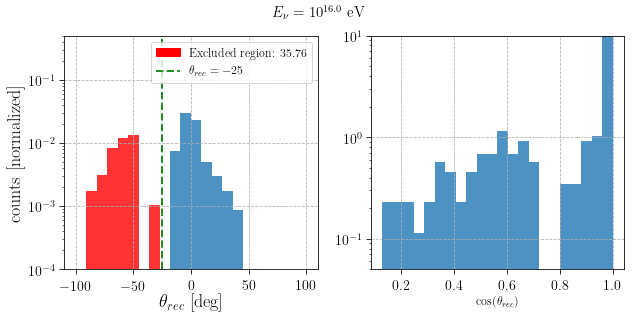

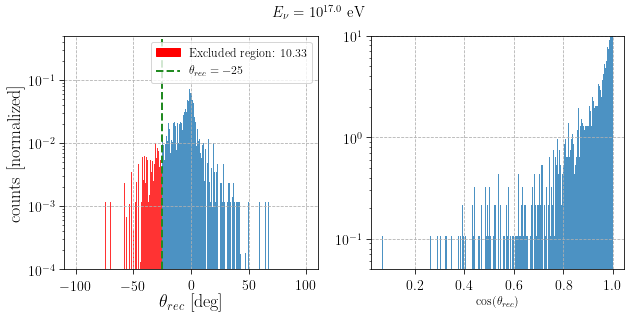

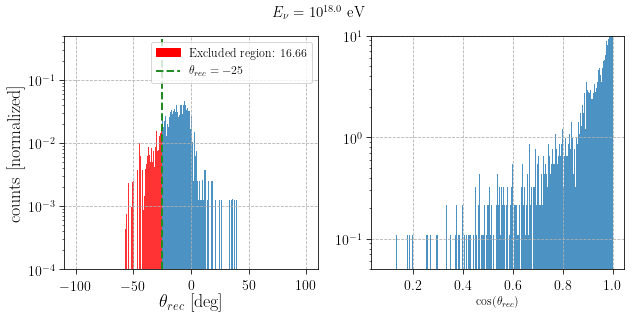

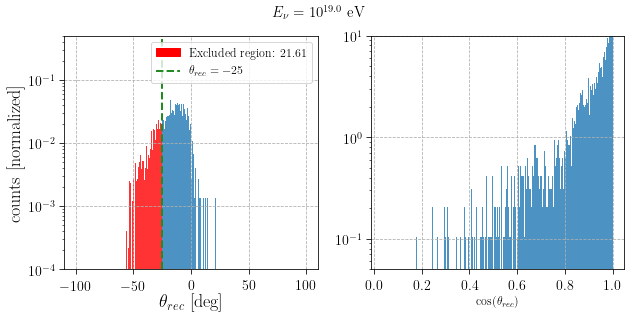

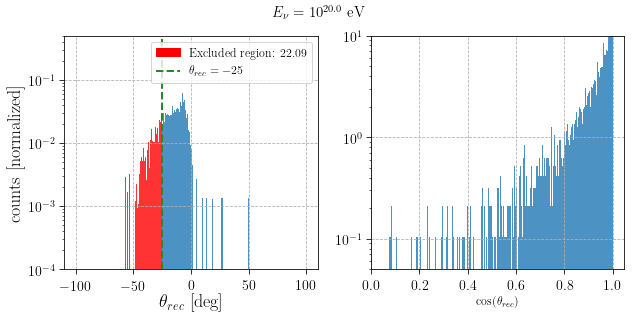

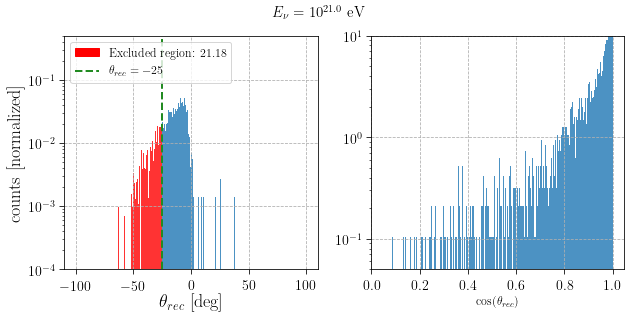

In [18]:
for energy in energy_array:
    f = ROOT.TFile.Open("/users/PAS0654/osu8354/ARA_cvmfs/source/AraSim/outputs/recAngles_%0.1f.root"%energy)
    tree = f.Get('arrivalAngles_%0.0f_tree'% int(energy*2))
    print('arrivalAngles_%0.0f_tree'%int(energy*2))


    ang_forHist=[]
    ang_cutoff=[]
    weights = []
    for event in range(tree.GetEntries()):
        tree.GetEntry(event)
        ang_forHist.append(np.degrees(tree.theta-np.pi/2))
        weights.append(tree.weight)
#         if (np.degrees(tree.theta-np.pi/2)<-25):
#             ang_cutoff.append(np.degrees(tree.theta-np.pi/2))
    # plt.hist(np.cos(ang_forHist), bins=1000, density=True);
    # plt.ylim(0,5)
    numBins=int(tree.GetEntries()/10)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

    values, bins, patches = axes[0].hist(ang_forHist, bins=numBins, weights=weights, range=(-100, 100), density=True, alpha=0.8);
    bin_to_integrate = int(len(bins)-125/np.diff(bins)[0])
    line = axes[0].axvline(-25, color='forestgreen', linestyle='dashed', linewidth=2, label="$\\theta_{rec}=-25$")
#     print(bins[bin_to_integrate])
    area = sum(np.diff(bins[:bin_to_integrate+1])*values[:bin_to_integrate])
    # axes[0].set_title("Histogram of $\\theta_{rec}$", fontsize=12)
    for i in range(0,bin_to_integrate):    
        patches[i].set_facecolor('r')
    axes[0].set_xlabel("$\\theta_{rec}$ [deg]")
    axes[0].set_ylabel("counts [normalized]")
    axes[0].set_yscale("log")
    axes[0].set_ylim(1E-4, 5E-1)
    axes[0].grid(linestyle='--', linewidth=0.8)
    red_patch = mpatches.Patch(color='red', label='Excluded region: %0.2f%%'%(area*100))
    axes[0].legend(handles=[red_patch,line])

    axes[1].hist(np.cos(np.radians(ang_forHist)), bins=numBins, density=True,alpha=0.8);
    # axes[1].set_title("Histogram of $\cos(\\theta_{rec})$", fontsize=12)
    axes[1].set_xlabel("$\cos(\\theta_{rec})$", fontsize=12)
    axes[1].set_yscale("log")
    axes[1].set_ylim(5E-2, 1E1)
    axes[1].grid(linestyle='--', linewidth=0.8)


    # axes[1].set_ylim(0,0.01)

    # axes[1].set_yscale('log')
    # plt.legend()
    fig.suptitle("$E_{\\nu} = 10^{%0.1f} $ eV" %energy, fontsize=15)
    fig.tight_layout(rect=[0, 0.09, 1, 0.95])
#     fig.savefig("theta_rec_distro_1E%0.1f.pdf"%energy)